# Fruit recognition

Le projet consiste à créer une intelligence artificielle qui permet de classer des fruits selon une image.
Nous avons un jeu de données de plus de 16000 images de 100x100px

## Chargement des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as im
import sklearn as sk
import glob
import os
import datetime as dt
import seaborn as sea
import cv2 as cv

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

## Chargement des données

### Définition des catégories

In [2]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

### Récupération des images

In [ ]:
tabImg=pd.DataFrame()
label = []
root_dir=os.getcwd()+"\\data\\train\\"

for filename in glob.iglob(root_dir+'**\\*.jpg',recursive=True):
    img=im.imread(filename)
    img=img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
    
    fruit_name=filename.split('\\')[-2]
    
    label.append(categories.index(fruit_name))
    tabImg=tabImg.append(pd.Series(img),ignore_index=True)
tabImg['label']=label

In [ ]:
np.save('train.npy', tabImg) #Sauvergarde en npy

In [ ]:
tabImg.head(5) #Pour vérifier l'organisation des données

## Récupération des données

In [3]:
tab = np.load('train.npy', allow_pickle=True) #Chargement des données depuis le .npy

In [4]:
tab.shape # On verifie le nombre de données récupérées

(16854, 30001)

In [5]:
tab=pd.DataFrame(tab) #Transformation en DataFrame

In [6]:
tab.head(5) #Pour vérifier l'organisation des données

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,246.0,253.0,255.0,247.0,253.0,255.0,249.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,251.0,255.0,255.0,253.0,255.0,254.0,252.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [7]:
tab.isna().sum() #Ici, on vérifie qu'il n'y a aucune valeur nulles ou non renseignées

0        0
1        0
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Length: 30001, dtype: int64

# Traitement des données et modèles

In [8]:
X=tab.iloc[:,:-1] #On charge les bonnes données dans le X 
print(X.shape) #On verifie la taille
X.head(5) #Pour vérifier l'organisation des données

(16854, 30000)


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,246.0,253.0,255.0,247.0,253.0,255.0,249.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,251.0,255.0,255.0,253.0,255.0,254.0,252.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [9]:
Y=tab.iloc[:,-1] #On charge les bonnes données dans le Y
print(Y.shape) #On verifie la taille
Y.head(5) #Pour vérifier l'organisation des données

(16854,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 30000, dtype: float64

# Utilisation des modèles

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0) #Séparation en train et test

## KNN

### Trouver les bons paramètres

Dans la partie suivante, nous avons réalisé une boucle permettant d'observer les meilleurs paramètres utilisables pour le modèle

In [20]:
resKNN=[]
for i in range(1,31,2):           
    KKN = KNeighborsClassifier(n_neighbors=i)
    clf=KKN.fit(Xtrain,ytrain)
    ypredit=clf.predict(Xtest)
    resKNN=np.insert(resKNN,0,accuracy_score(ytest,ypredit)) #On insère les résultats dans un tableau

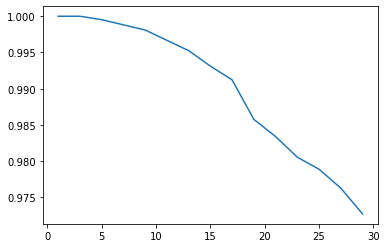

In [21]:
plt.plot(range(1,31,2),np.flip(resKNN)) #On affiche le résultat sous forme de courbe
#Le reverse est pour le fait que les valeurs du tableau sont à l'envers

In [22]:
filename='saves/KNN.npy'
np.save(filename, np.flip(resKNN)) #On sauvegarde les résultats

In [23]:
resKNN = np.load('saves/KNN.npy', allow_pickle=True) #On charge les résultats

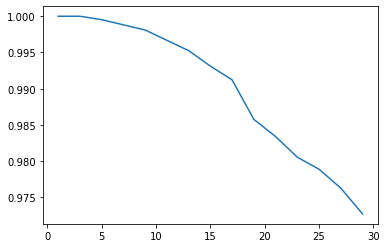

In [24]:
plt.plot(range(1,31,2),resKNN) # Et on ré-affiche la courbe pour s'assurer que les données sont les mêmes

### Affichage avec les bons paramètres

In [10]:
KKN = KNeighborsClassifier(n_neighbors=1) # On fait donc le modèle avec les meilleurs paramèrtes
clf=KKN.fit(Xtrain,ytrain)
ypredit=clf.predict(Xtest)
accuracy_score(ytest,ypredit)

In [15]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit) #On récupère et on affiche la matrice de confusion
print(mat_confusion)

(33, 33)
[[128   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  1   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 118   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 103]]


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

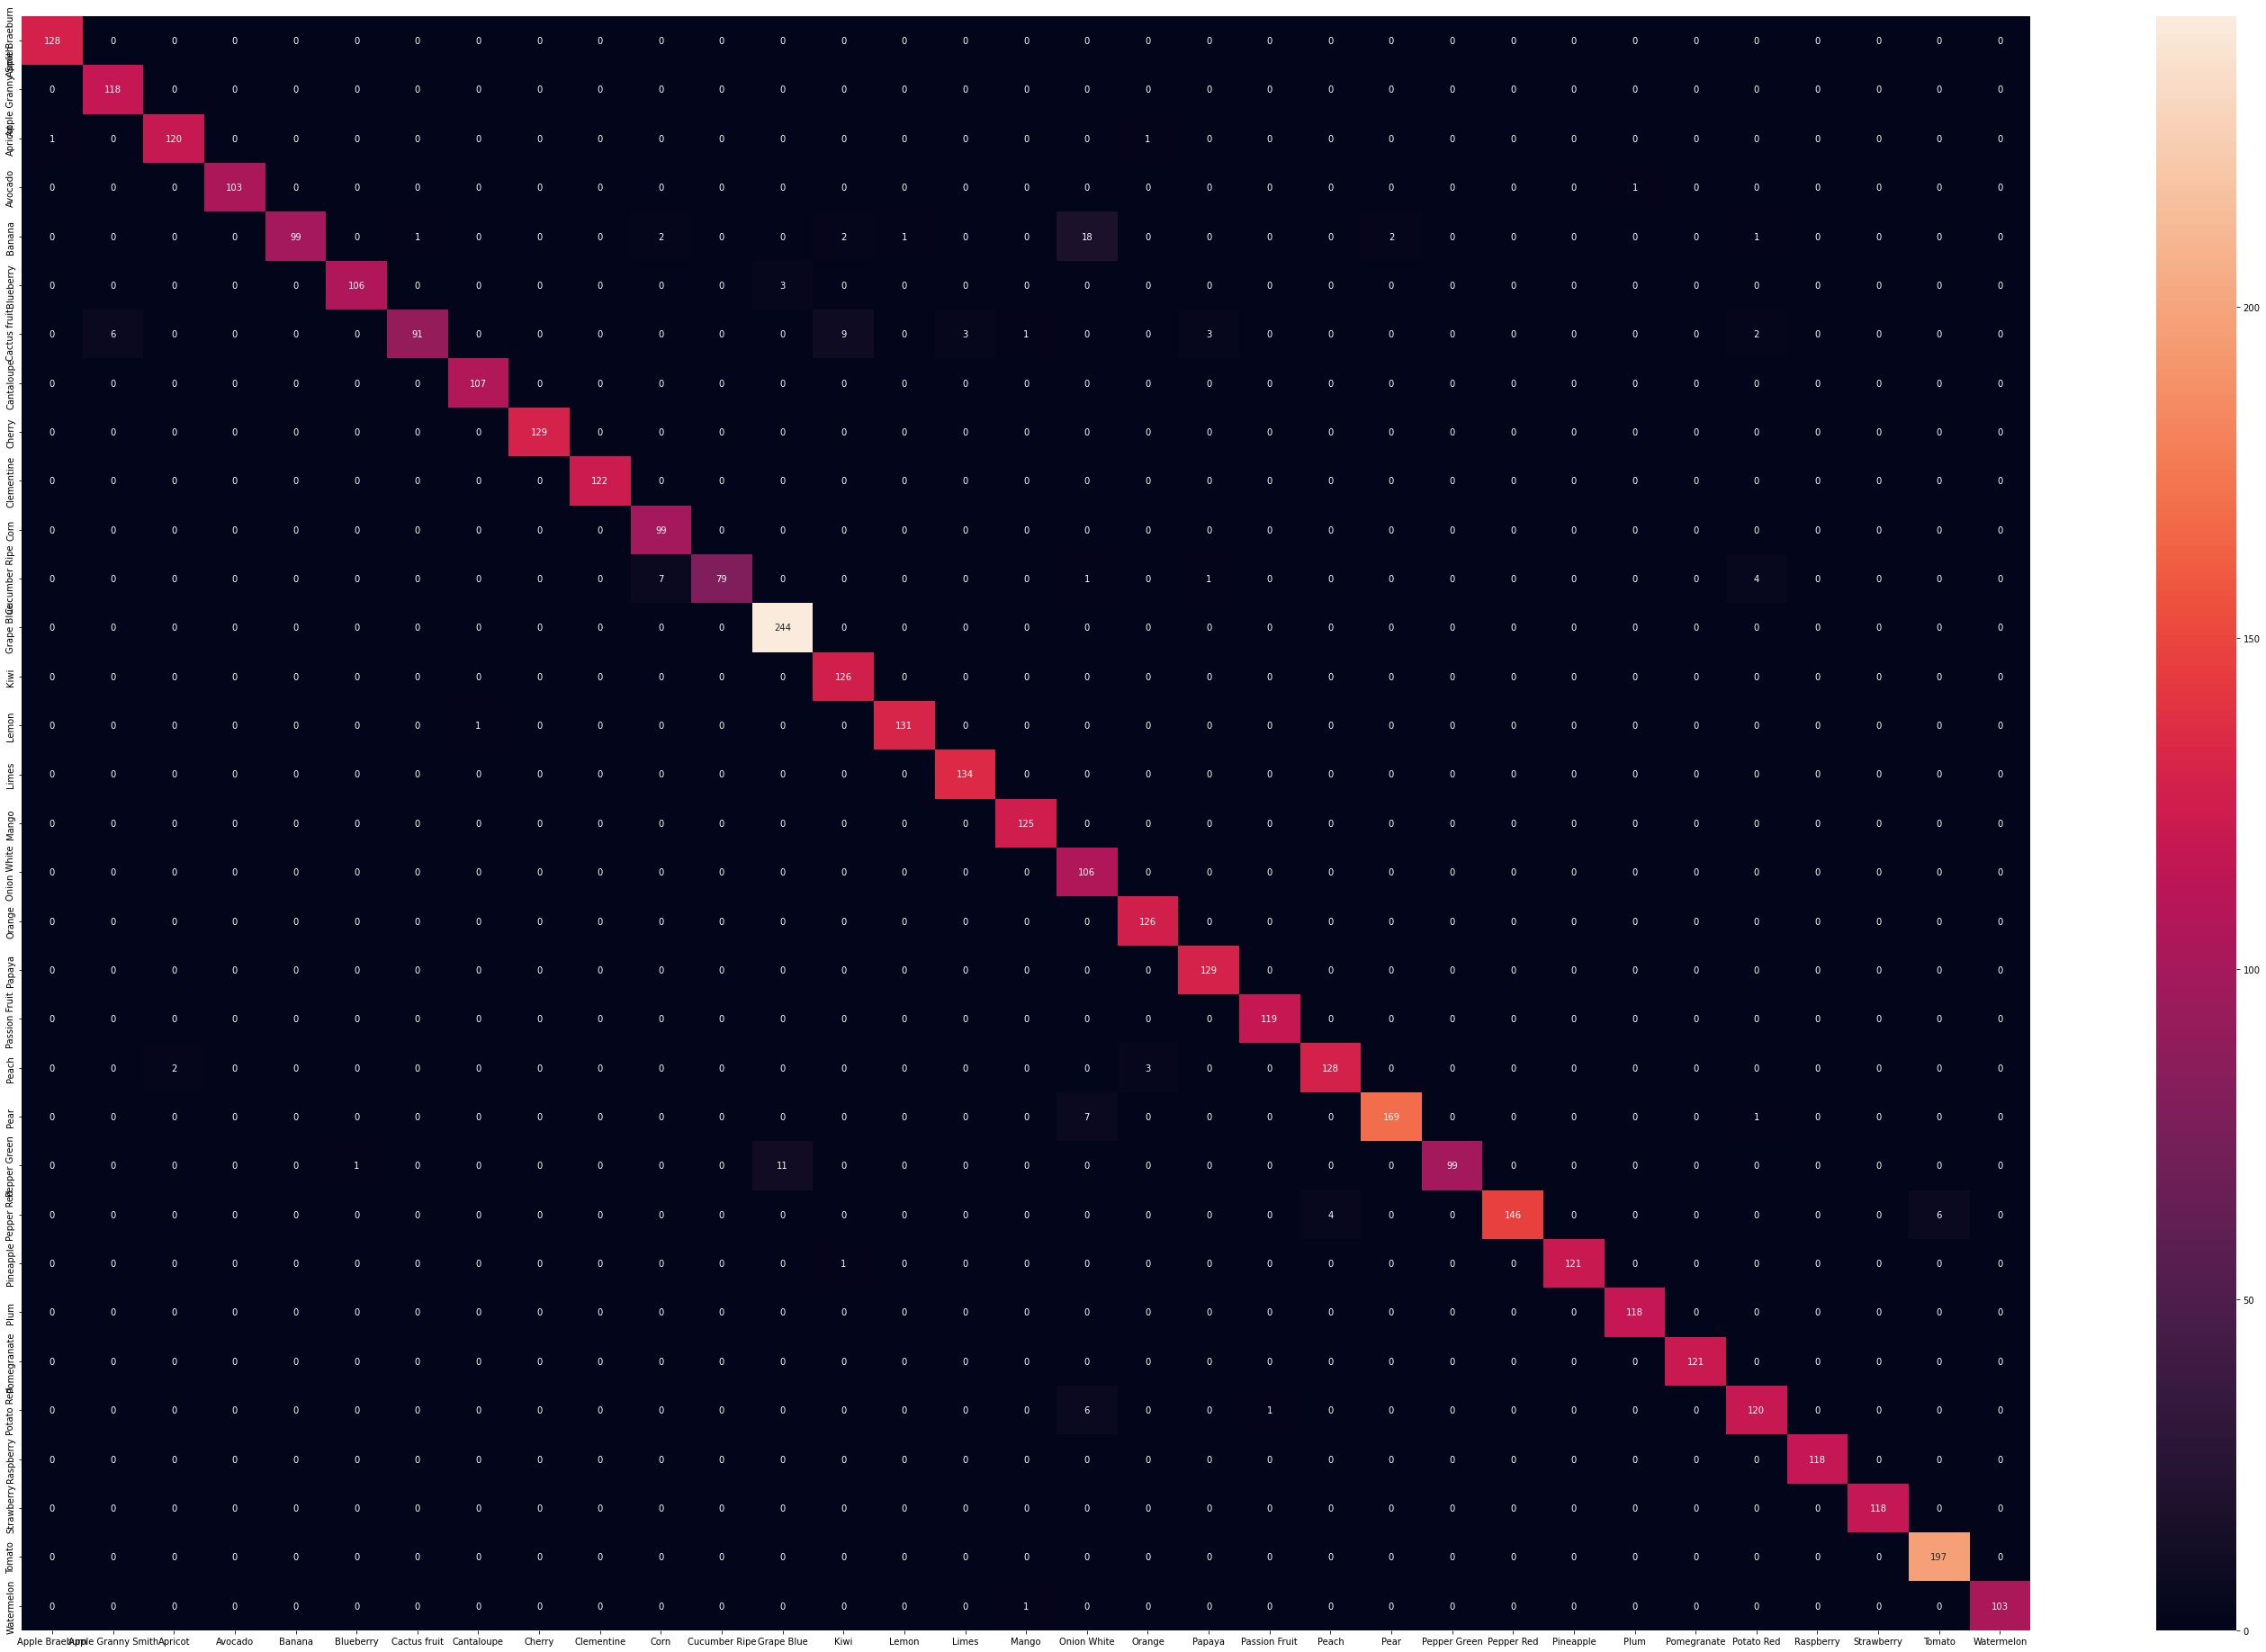

In [16]:
f,ax=plt.subplots(figsize=(30,30))
sea.heatmap(mat_confusion,annot=True,fmt=".0f") # Et on la transforme en Heatmap
ax.set_xticklabels(categories) # Permet de placer les noms des classes à la place des entiers
ax.set_yticklabels(categories) #


## SVM


### Trouver les bons paramètres

Dans la partie suivante, nous avons réalisé une boucle permettant d'observer les meilleurs paramètres utilisables pour le modèle

In [18]:
resSVM=[]
i=0.001
while i<=1:
    clf=svm.SVC(gamma=i,kernel='poly')
    clf.fit(Xtrain,ytrain)
    ypredit=clf.predict(Xtest)
    resSVM=np.insert(resSVM,0,accuracy_score(ytest,ypredit))
    i=i*10 # On multiplie par 10 pour avoir [0.001,0.01,0.1,1]

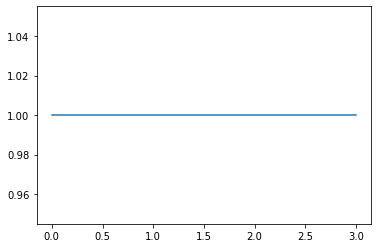

In [19]:
plt.plot(np.flip(resSVM))#On affiche le résultat sous forme de courbe
#Le reverse est pour le fait que les valeurs du tableau sont à l'envers

In [11]:
filename='saves/SVM.npy'
np.save(filename, np.flip(resSVM)) # On sauvegarde le résultat

In [12]:
resSVM = np.load('saves/SVM.npy', allow_pickle=True) # On charge les résultats

[1. 1. 1. 1.]


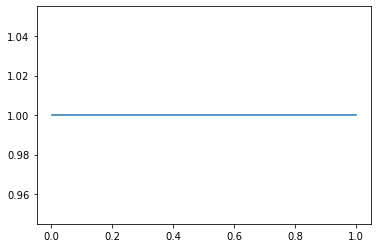

In [14]:
plt.plot([0.001,0.01,0.1,1],resSVM) # Et on ré-affiche la courbe pour s'assurer que les données sont les mêmes

### Affichage avec les bons paramètres

In [10]:
clf=svm.SVC(kernel='poly') # On choisit donc un kernel 'poly'
clf.fit(Xtrain,ytrain)
ypredit=clf.predict(Xtest)
accuracy_score(ytest,ypredit) # On observe l'accuracy score

1.0

In [11]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit) #On récupère et on affiche la matrice de confusion
print(mat_confusion)

[[128   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0 122 ...   0   0   0]
 ...
 [  0   0   0 ... 118   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 104]]


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

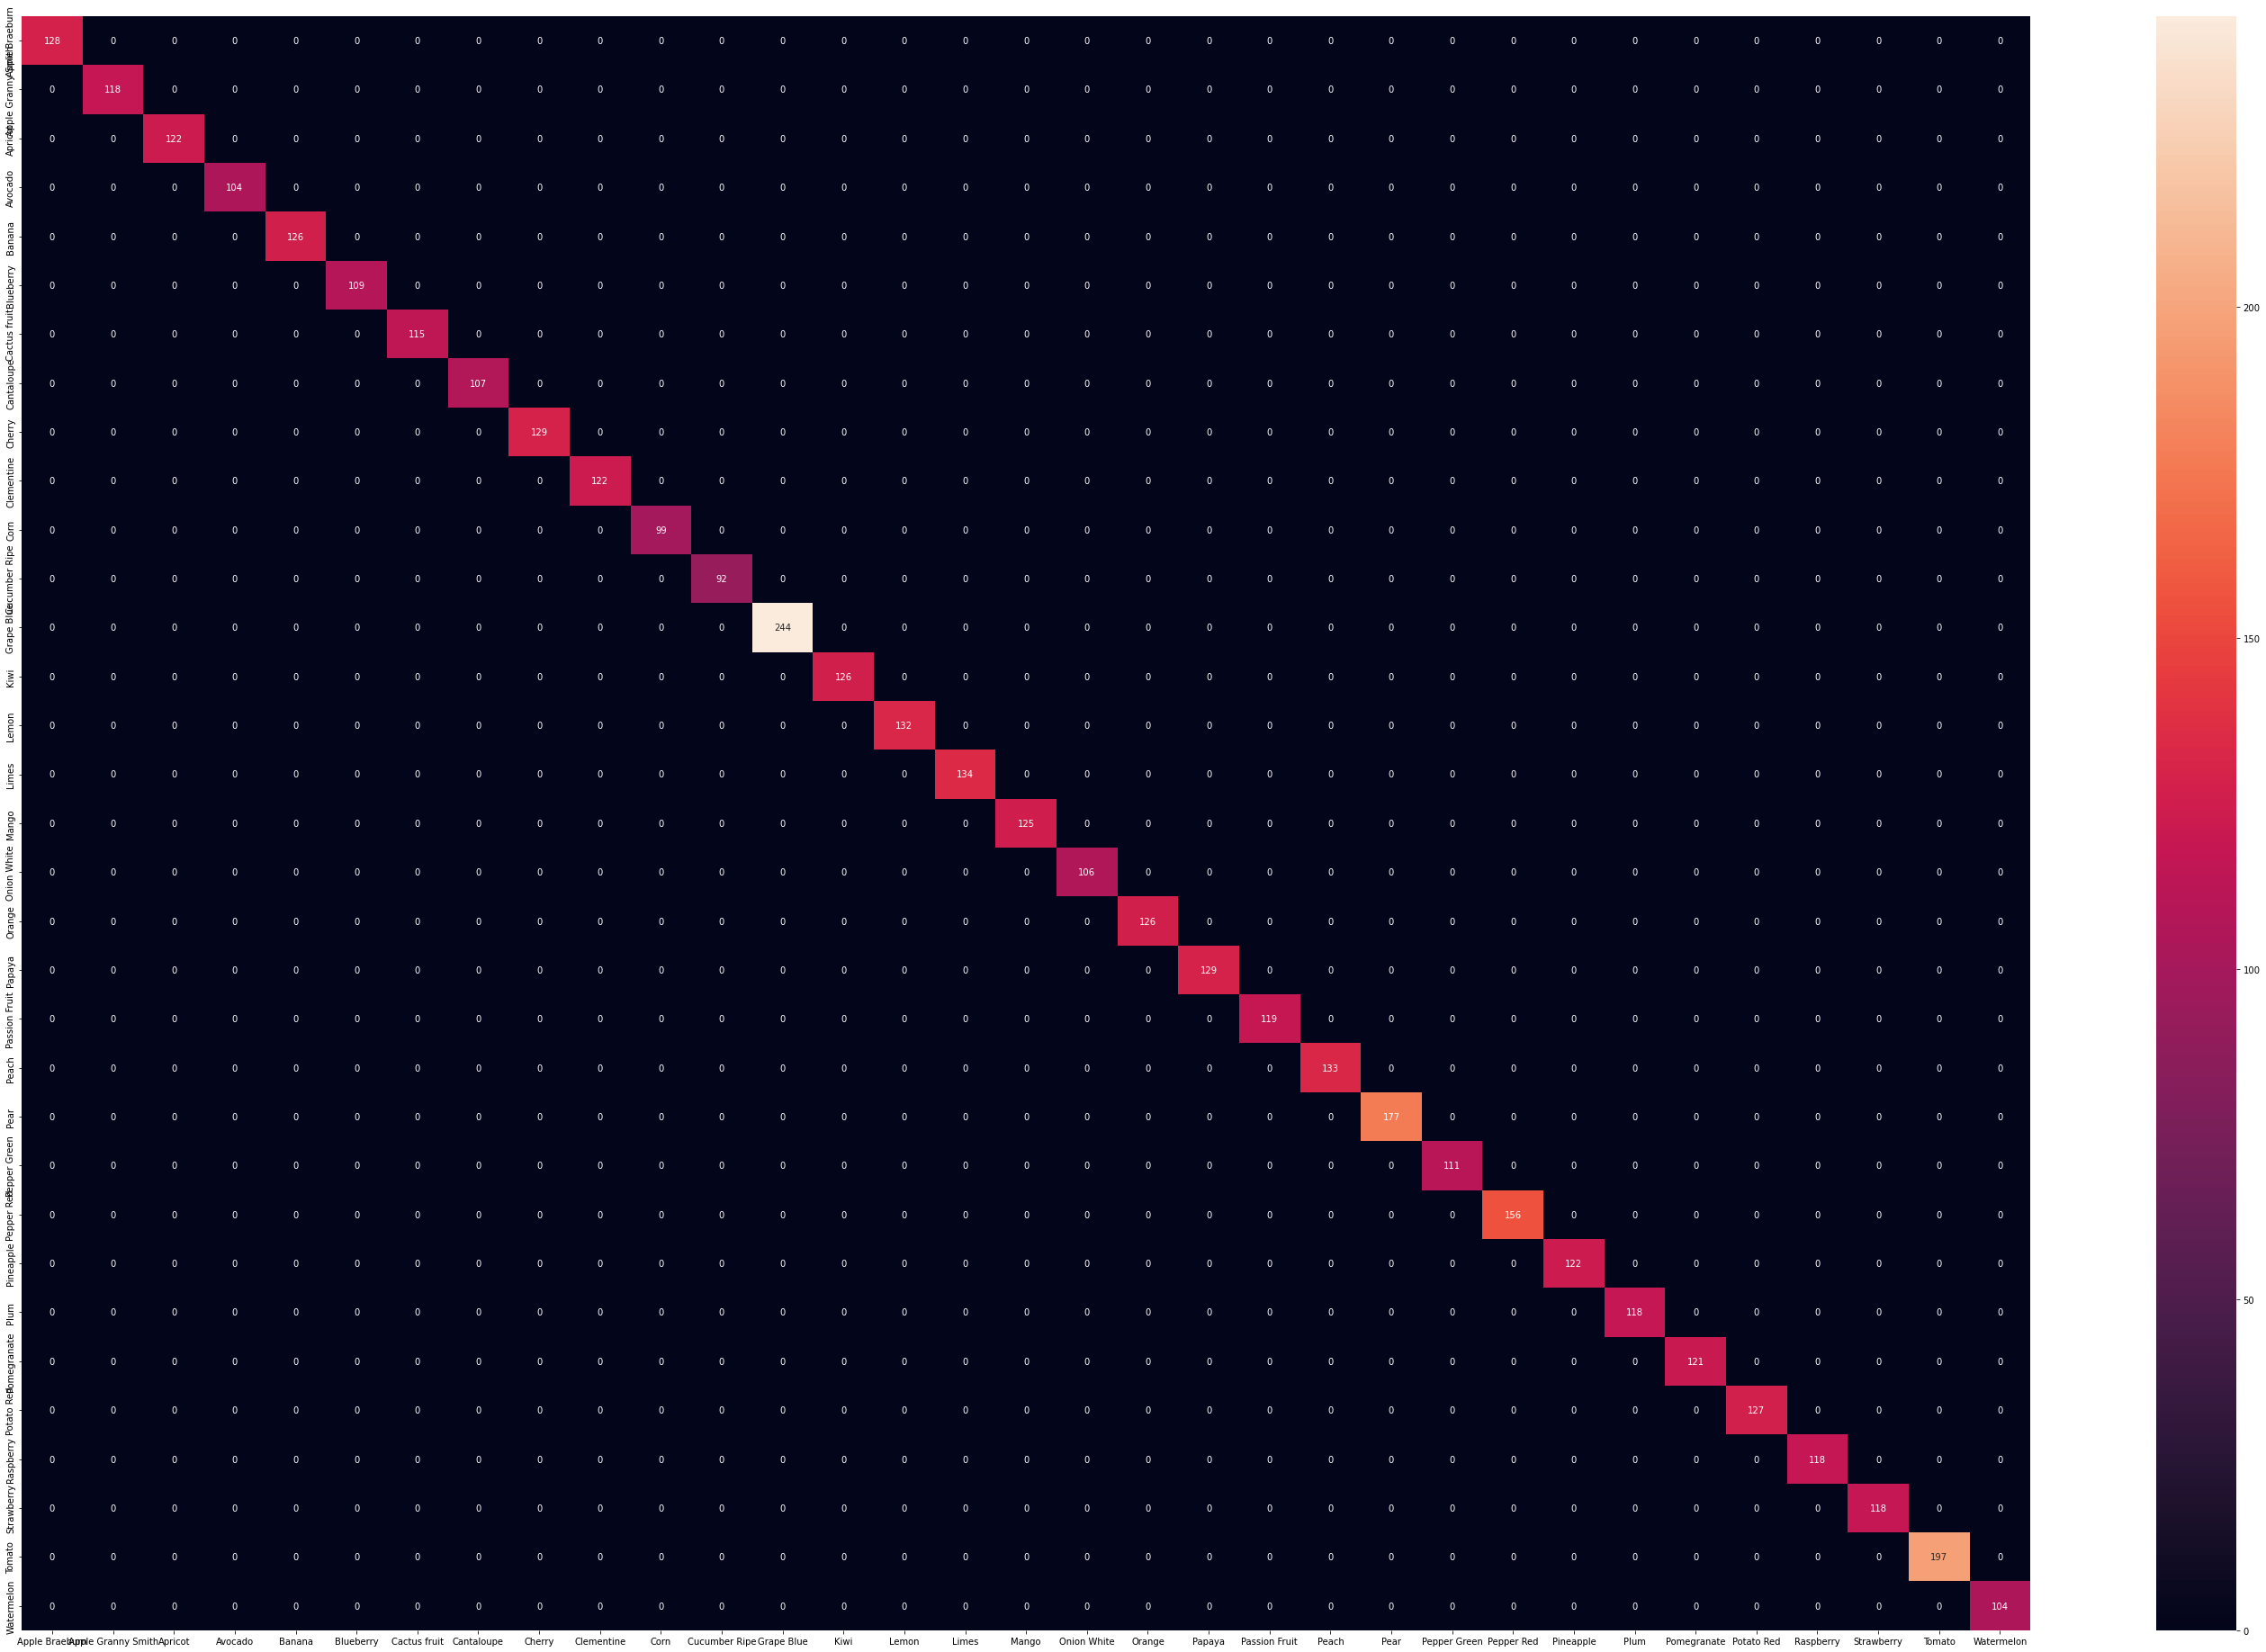

In [12]:
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f") # Et on la transforme en Heatmap
ax.set_xticklabels(categories) # Permet de placer les noms des classes à la place des entiers
ax.set_yticklabels(categories)


## Decision Tree

### Trouver les bons paramètres

Dans la partie suivante, nous avons réalisé une boucle permettant d'observer les meilleurs paramètres utilisables pour le modèle

In [19]:
resTree=[]
for i in range(5,30,3):
    Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=i)
    clf = Arbre_decision.fit(Xtrain, ytrain)
    ypredit=clf.predict(Xtest)
    resTree=np.insert(resTree,0,accuracy_score(ytest,ypredit))

In [21]:
filename='saves/DecisionTree.npy'
np.save(filename, np.flip(resTree)) # On sauvegarde le résultat

In [22]:
resTree = np.load('saves/DecisionTree.npy', allow_pickle=True) # On charge les résultats

[0.34029426 0.61295681 0.80137636 0.92287613 0.95467489 0.96108211
 0.95633602 0.96226863 0.96226863]


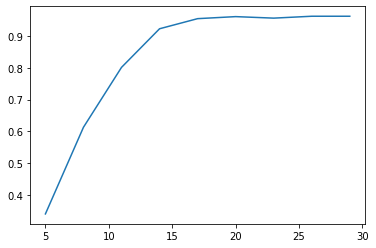

In [23]:
plt.plot(range(5,30,3),resTree) # Et on ré-affiche la courbe pour s'assurer que les données sont les mêmes

### Affichage avec les bons paramètres

In [13]:
Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20) # On choisit donc un max_depth de 20
clf = Arbre_decision.fit(Xtrain, ytrain)
ypredit=clf.predict(Xtest)
accuracy_score(ytest,ypredit) # On observe l'accuracy score

0.9610821072615092

In [14]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit) #On récupère et on affiche la matrice de confusion
print(mat_confusion)

[[122   0   2 ...   0   0   0]
 [  0 114   1 ...   0   0   0]
 [  0   0 121 ...   1   0   0]
 ...
 [  3   0   0 ... 109   2   0]
 [  0   0   0 ...   0 195   0]
 [  0   0   0 ...   0   0  97]]


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

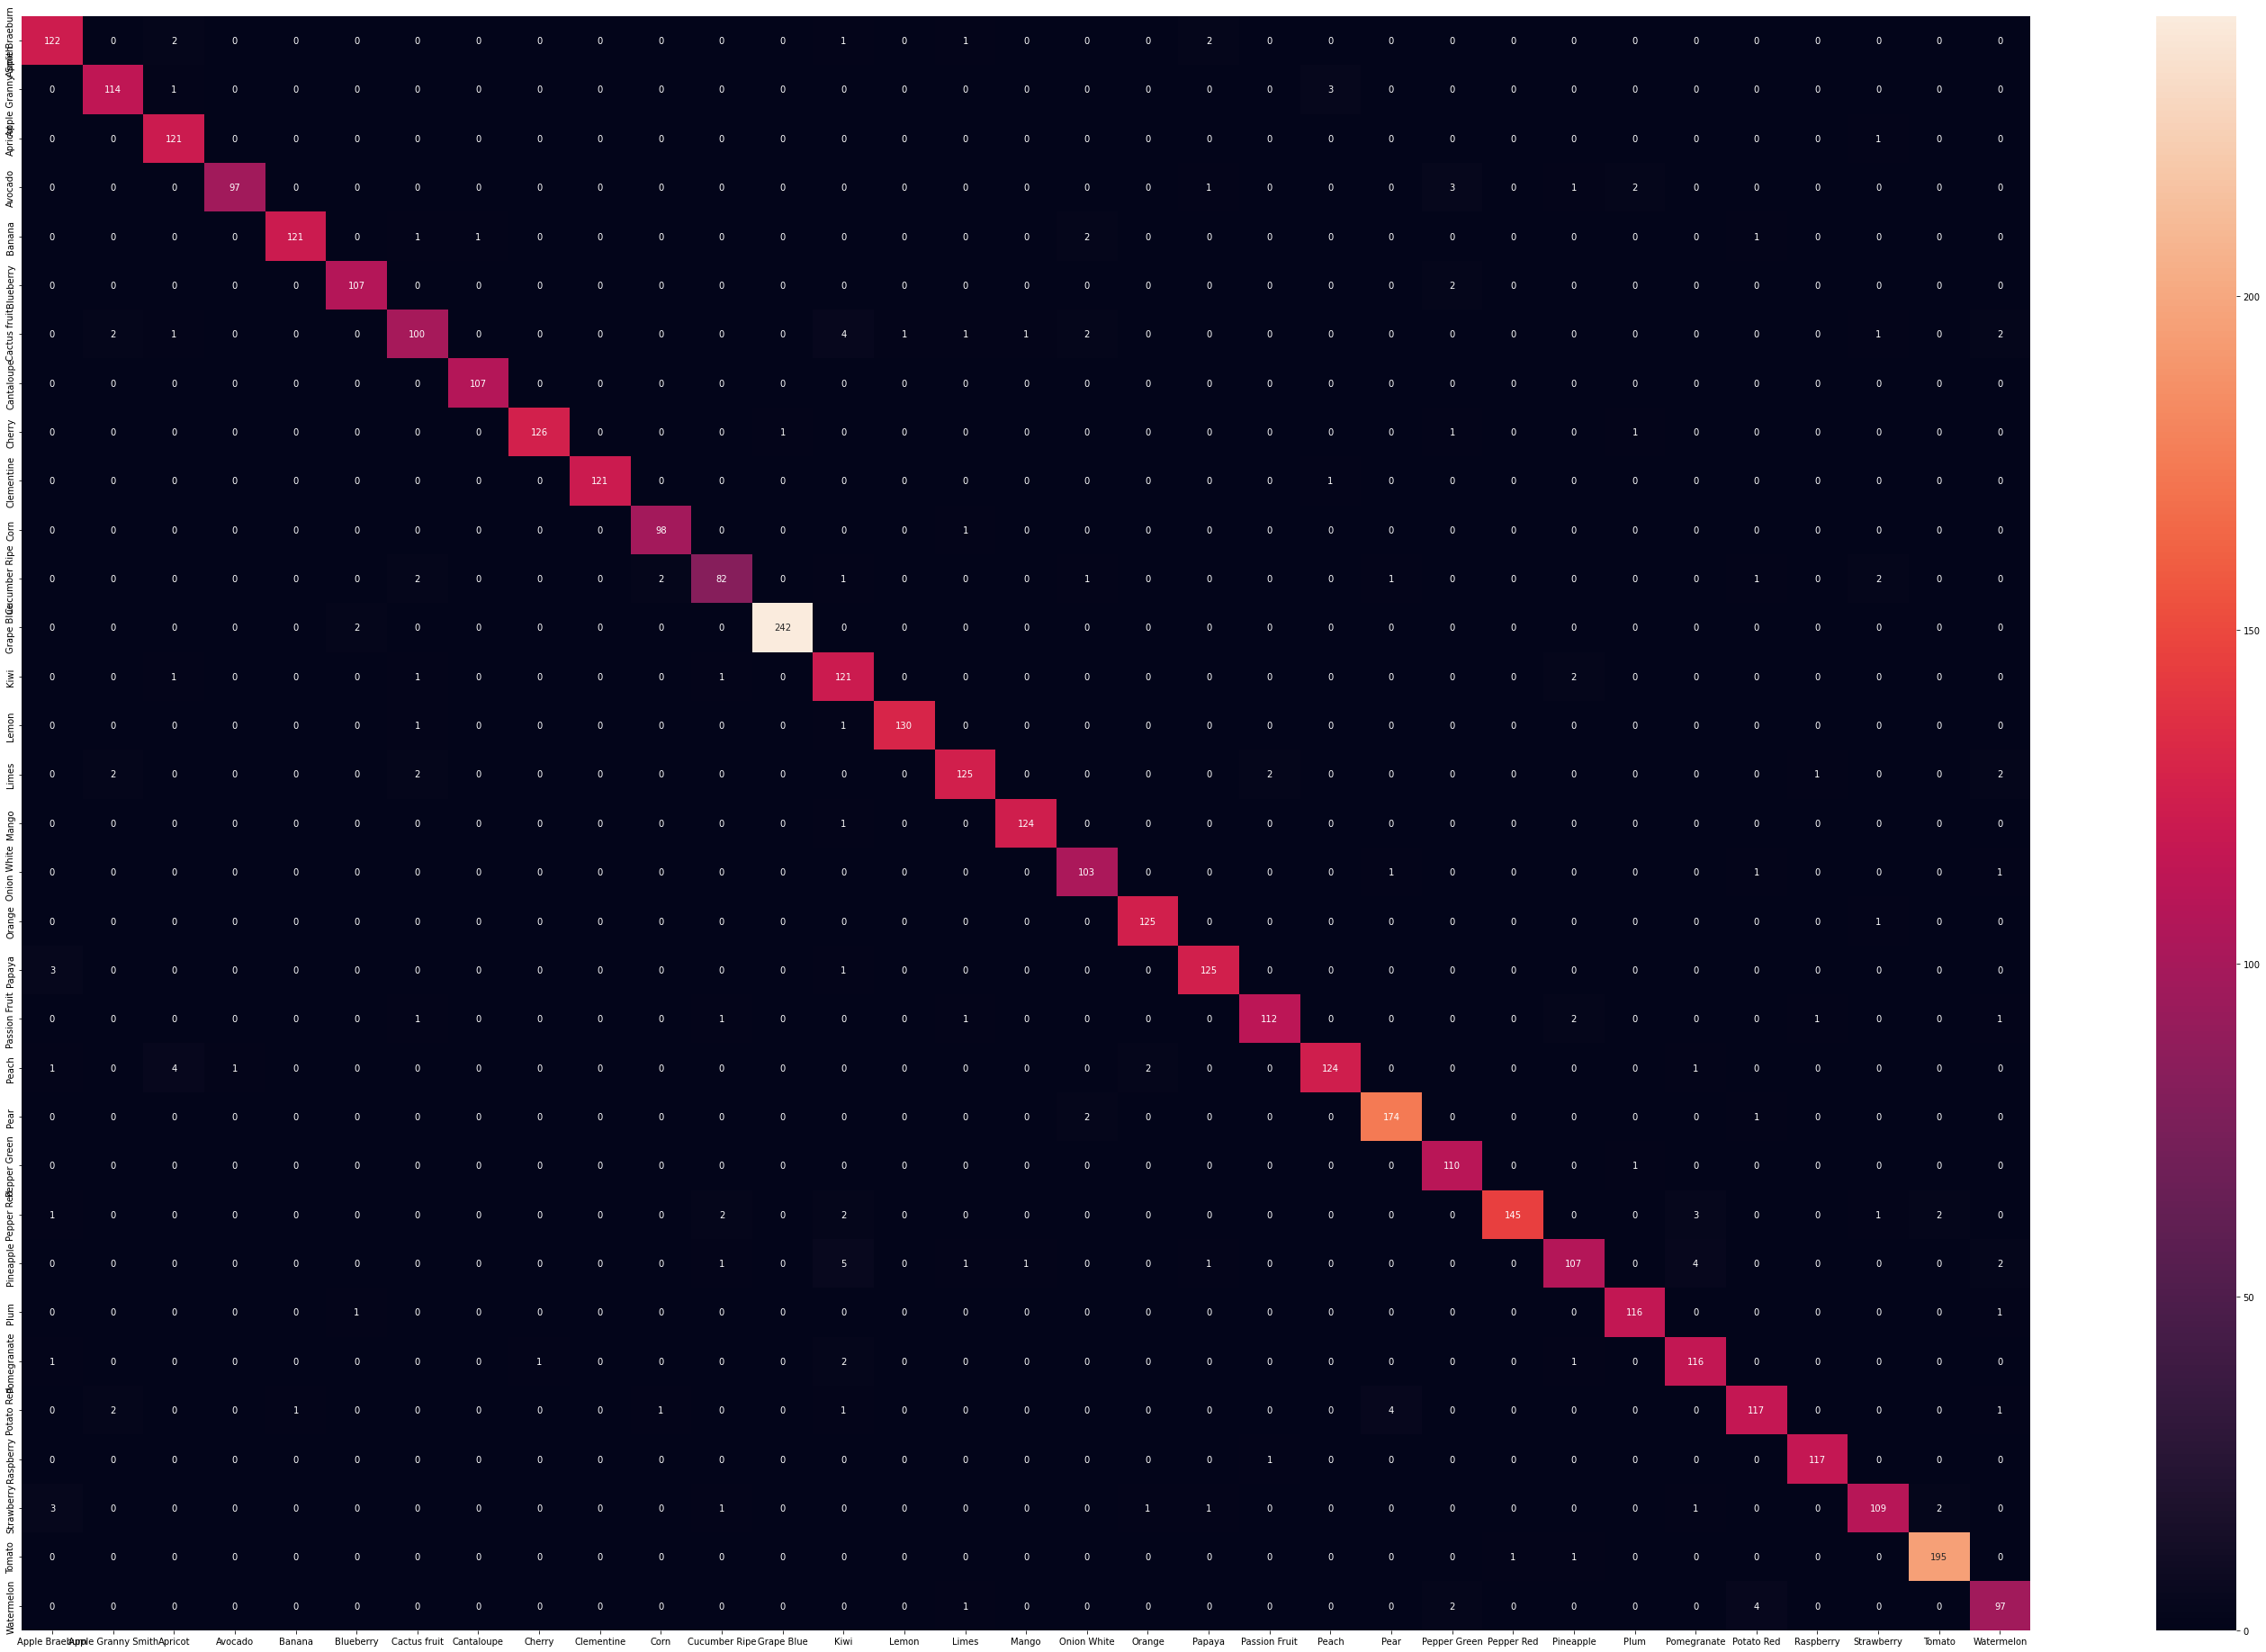

In [15]:
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f") # Et on la transforme en Heatmap
ax.set_xticklabels(categories) # Permet de placer les noms des classes à la place des entiers
ax.set_yticklabels(categories)

## Gaussian Naive Bale

### Affichage avec les bons paramètres

In [16]:
GNB_classifier = GaussianNB() # Sans paramètres
GNB_classifier.fit(Xtrain, ytrain)
predicted = GNB_classifier.predict(Xtest)
accuracy_score(ytest,predicted) # On affiche l'accuracy score

0.9375889890840057

In [17]:
mat_confusion=metrics.confusion_matrix(ytest,predicted) #On récupère et on affiche la matrice de confusion
print(mat_confusion)

[[123   0   1 ...   0   0   0]
 [  0 107   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 112   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   1   0 101]]


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

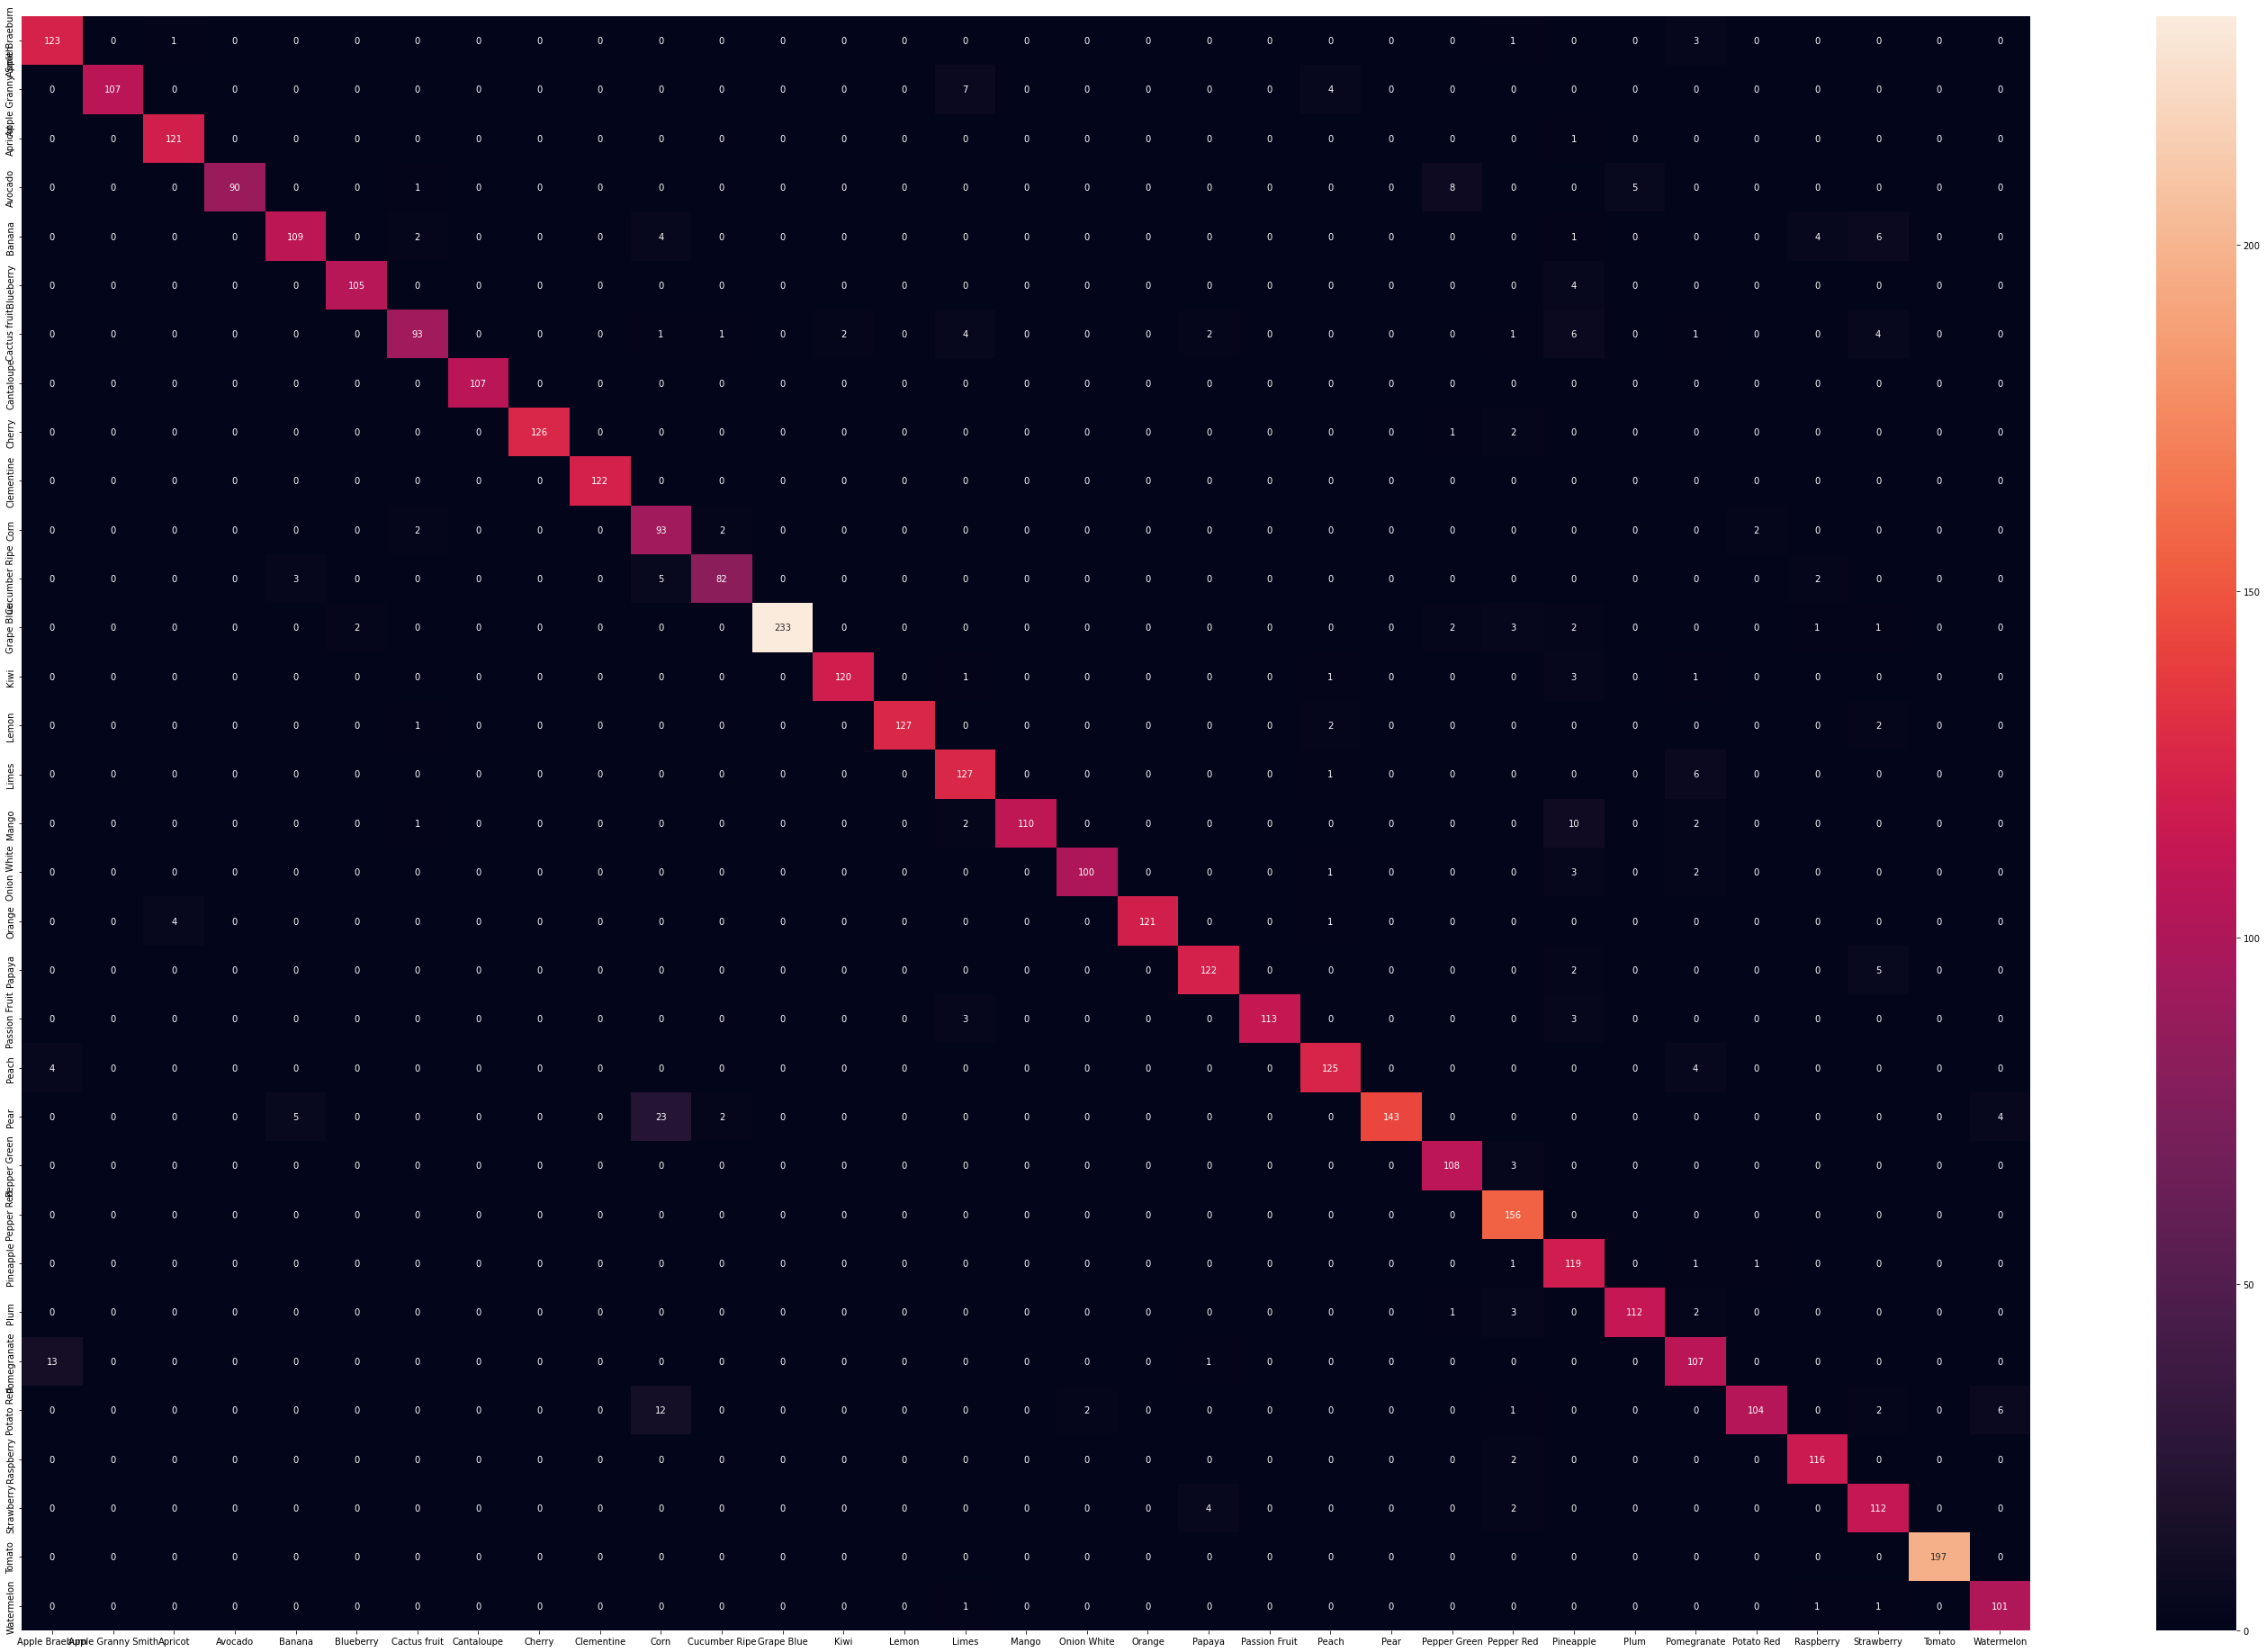

In [18]:
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f") # Et on la transforme en Heatmap
ax.set_xticklabels(categories) # Permet de placer les noms des classes à la place des entiers
ax.set_yticklabels(categories)

## Neural network

### Affichage avec les bons paramètres

In [11]:
classifier=MLPClassifier(hidden_layer_sizes=(150,150,50),solver="lbfgs") # Paramètres que l'on a trouvés
classifier.fit(Xtrain, ytrain)
ypredit=classifier.predict(Xtest)
accuracy_score(ytest,ypredit) # On affiche l'accuracy score

0.9985761746559089

In [12]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit) #On récupère et on affiche la matrice de confusion
print(mat_confusion)

[[128   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 117   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 104]]


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

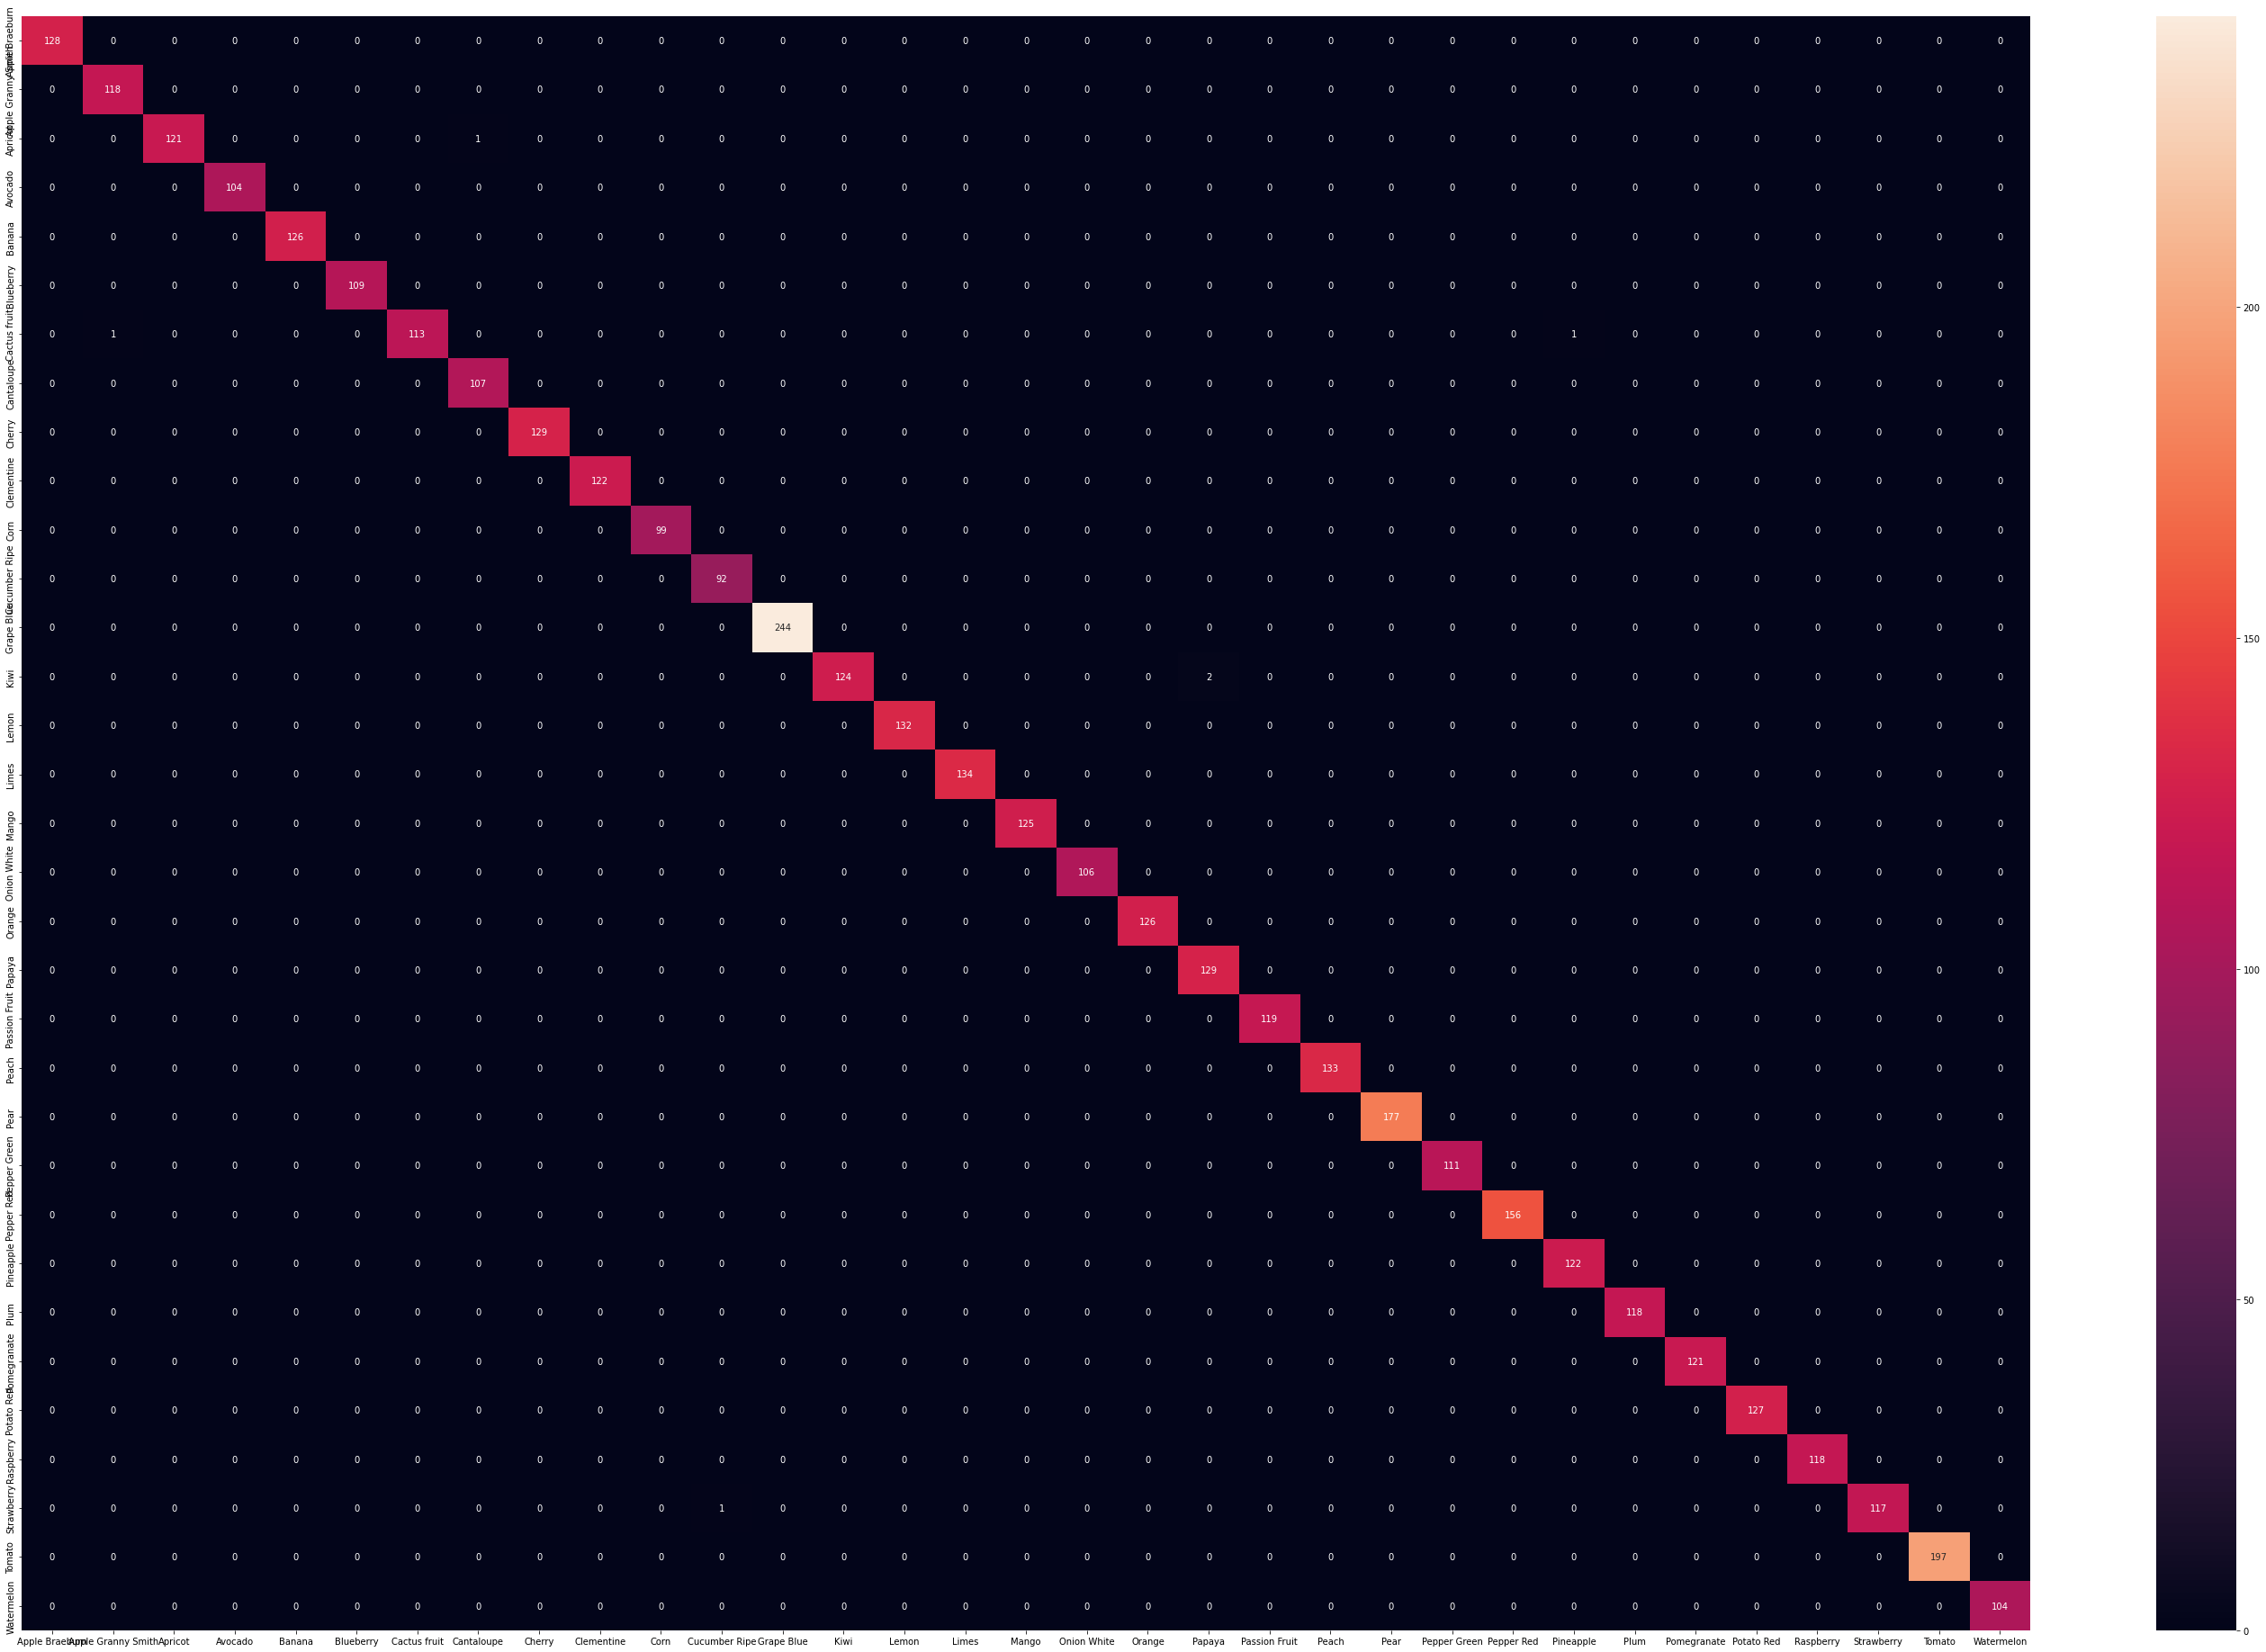

In [16]:
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f") # Et on la transforme en Heatmap
ax.set_xticklabels(categories) # Permet de placer les noms des classes à la place des entiers
ax.set_yticklabels(categories)

# Test de SVM avec des images

### Récupération de l'image n°1

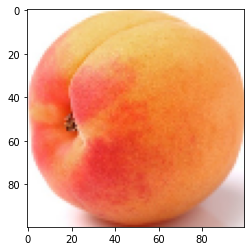

In [45]:
root_dir=os.getcwd()+"\\data\\other\\"
img=im.imread(root_dir+'abricot1.jpg') # On récupére l'image
dim=(100,100)
resized=cv.resize(img,dim) # On la redimmensionne pour qu'elle fasse 100x100 px
plt.imshow(resized) 

#### Modification de la dimension de l'image

In [48]:
reshape=resized.reshape(1,100*100*3) # On transforme l'image en ligne
abricot=pd.DataFrame(reshape) # Et on le met dans un DataFrame

#### Test avec SVM

In [49]:
clf=svm.SVC(kernel='poly')     
clf.fit(Xtrain,ytrain)         # On fait travailler l'IA
ypredit=clf.predict(abricot)   # On récupère le résultat
print(ypredit)  # On l'affiche
categories[9]   # On vérifie la catégorie trouvée

[9.]


'Clementine'

### Récupération de l'image n°2

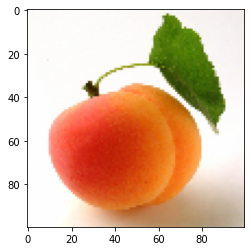

In [51]:
root_dir=os.getcwd()+"\\data\\other\\"
img=im.imread(root_dir+'abricot2.jpg') # On récupére l'image
dim=(100,100)
resized=cv.resize(img,dim) # On la redimmensionne pour qu'elle fasse 100x100 px
plt.imshow(resized) 

#### Modification de la dimension de l'image

In [52]:
reshape=resized.reshape(1,100*100*3) # On transforme l'image en ligne
abricot=pd.DataFrame(reshape) # Et on le met dans un DataFrame

#### Test avec SVM

In [54]:
clf=svm.SVC(kernel='poly')     
clf.fit(Xtrain,ytrain)         # On fait travailler l'IA
ypredit=clf.predict(abricot)   # On récupère le résultat
print(ypredit)  # On l'affiche
categories[22]   # On vérifie la catégorie trouvée

[22.]


'Pear'